<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Differences-between-ref-conditions" data-toc-modified-id="Differences-between-ref-conditions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differences between ref conditions</a></span></li><li><span><a href="#Trace-Elt-Mixture" data-toc-modified-id="Trace-Elt-Mixture-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trace Elt Mixture</a></span></li></ul></div>

In [4]:
from pymodulon.io import *
from pymodulon.plotting import *
from pymodulon.util import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import pearsonr

In [5]:
ica = load_json_model('../../data.json')

## Differences between ref conditions

In [6]:
wt_samples = ica.sample_table.index[ica.sample_table.condition == 'wt_glc']
A_ctrl = ica.A[wt_samples]
variance = A_ctrl.var(axis = 1).sort_values(ascending = False)

In [7]:
variance.head(14)

FlhDC-2            238.616663
FliA               227.146572
Fur-1               76.613392
RpoS                61.343158
Anaero-related      38.138427
Envelope Stress     33.878459
CueR/CusR/HprR      33.701603
ZntR/Zur/CueR       27.509115
UC-1                24.771734
Fur-2               23.056074
Fnr+NarLP           22.514477
GadX                21.610464
Fe-related-2        20.796682
ppGpp               17.988645
dtype: float64

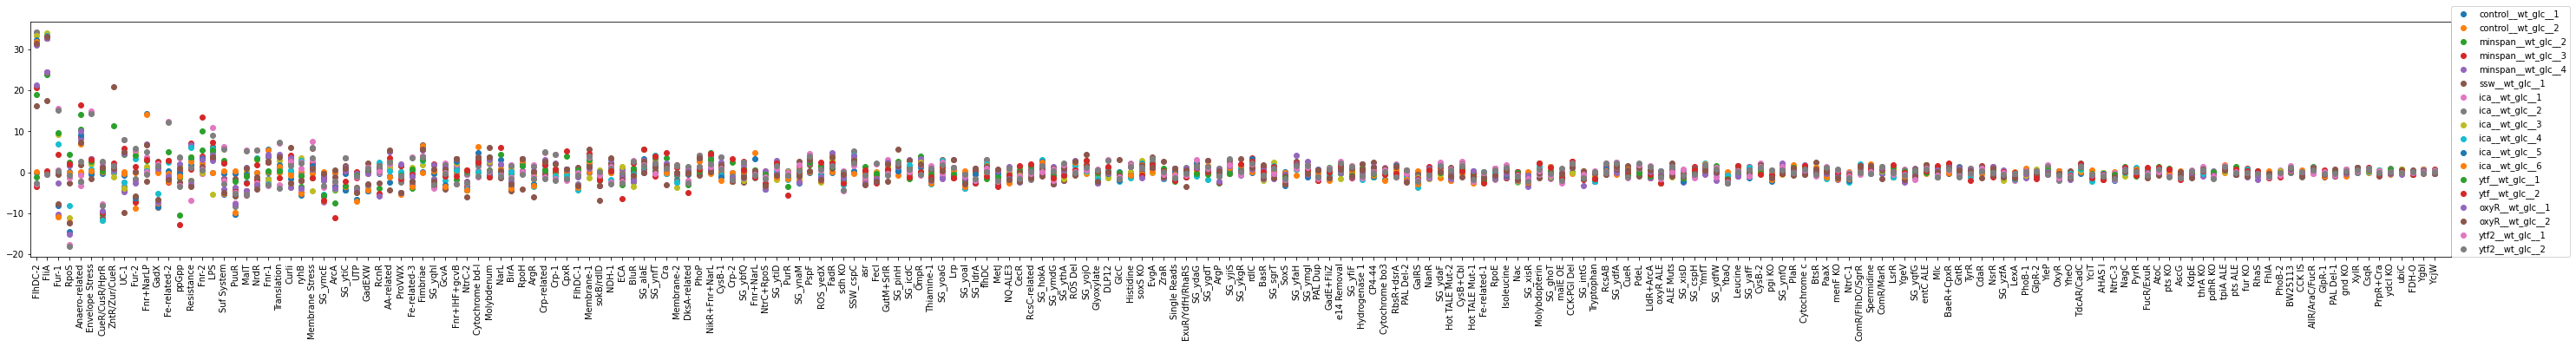

In [8]:
fig, ax = plt.subplots(figsize = (50, 5))

for s in wt_samples:
    ax.scatter(variance.index, ica.A.loc[variance.index, s], label = s)
    
ax.tick_params('x', rotation = 90)
ax.set_xlim(-0.5, len(ica.imodulon_names)+0.5)
ax.legend(loc = (1,0))

In [9]:
A_ctrl_stack = A_ctrl.stack().reset_index().rename(columns = {'level_0':'iM', 'level_1':'sample_name', 0:'val'})
for i, row in A_ctrl_stack.iterrows():
    A_ctrl_stack.loc[i, 'project'] = ica.sample_table.project[row.sample_name]
A_ctrl_stack

,iM,sample_name,val,project
0,e14 Removal,control__wt_glc__1,-0.128304,control
1,e14 Removal,control__wt_glc__2,0.128304,control
2,e14 Removal,minspan__wt_glc__2,-0.213836,minspan
3,e14 Removal,minspan__wt_glc__3,0.203803,minspan
4,e14 Removal,minspan__wt_glc__4,-0.019835,minspan
...,...,...,...,...
3919,SG_sgrT,ytf__wt_glc__2,1.452158,ytf
3920,SG_sgrT,oxyR__wt_glc__1,-1.480544,oxyR
3921,SG_sgrT,oxyR__wt_glc__2,-1.386182,oxyR
3922,SG_sgrT,ytf2__wt_glc__1,-0.184321,ytf2


Text(0, 0.5, 'iModulon Activity')

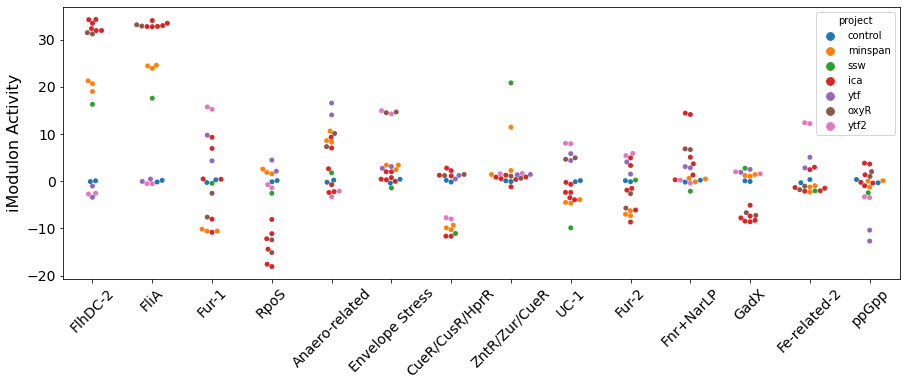

In [10]:
to_plot = pd.DataFrame(columns = A_ctrl_stack.columns)
for k in variance.head(14).index:
    to_plot = pd.concat([to_plot, A_ctrl_stack.loc[A_ctrl_stack.iM == k]], axis = 0)

fig, ax = plt.subplots(figsize = (15,5))
sns.swarmplot(data = to_plot, x = 'iM', y = 'val', hue = 'project', ax = ax)
ax.tick_params('x', rotation = 45)
ax.tick_params(labelsize = 14)
ax.set_xlabel('')
ax.set_ylabel('iModulon Activity', fontsize = 16)

In [11]:
cols_interest = ['project', 'creator', 'run_date', 'Trace Element Mixture', 'Sequencing Machine']
ica.sample_table.loc[wt_samples, cols_interest]

,project,creator,run_date,Trace Element Mixture,Sequencing Machine
control__wt_glc__1,control,Sangwoo Seo,4/17/13,sauer trace element mixture,MiSeq
control__wt_glc__2,control,Sangwoo Seo,4/17/13,sauer trace element mixture,MiSeq
minspan__wt_glc__2,minspan,Haythem Latif,10/1/12,sauer trace element mixture,GAIIX
minspan__wt_glc__3,minspan,Haythem Latif,10/1/12,sauer trace element mixture,GAIIX
minspan__wt_glc__4,minspan,Haythem Latif,10/1/12,sauer trace element mixture,MiSeq
ssw__wt_glc__1,ssw,Ying Hefner,4/18/17,sauer trace element mixture,HiSeq 2000
ica__wt_glc__1,ica,Ying Hefner,12/10/17,sauer trace element mixture,HiSeq 4000
ica__wt_glc__2,ica,Ying Hefner,12/10/17,sauer trace element mixture,HiSeq 4000
ica__wt_glc__3,ica,Ying Hefner,12/23/17,sauer trace element mixture,HiSeq 4000
ica__wt_glc__4,ica,Ying Hefner,12/23/17,sauer trace element mixture,HiSeq 4000


In [12]:
wt_samples

Index(['control__wt_glc__1', 'control__wt_glc__2', 'minspan__wt_glc__2',
       'minspan__wt_glc__3', 'minspan__wt_glc__4', 'ssw__wt_glc__1',
       'ica__wt_glc__1', 'ica__wt_glc__2', 'ica__wt_glc__3', 'ica__wt_glc__4',
       'ica__wt_glc__5', 'ica__wt_glc__6', 'ytf__wt_glc__1', 'ytf__wt_glc__2',
       'oxyR__wt_glc__1', 'oxyR__wt_glc__2', 'ytf2__wt_glc__1',
       'ytf2__wt_glc__2'],
      dtype='object')

In [13]:
corr_df = pd.DataFrame(index = wt_samples, columns = wt_samples)


for i, j in combinations(wt_samples, 2):
    r, p = pearsonr(ica.log_tpm[i], ica.log_tpm[j])
    corr_df.loc[i, j] = r
    corr_df.loc[j, i] = r
    
corr_df = corr_df.fillna(1)

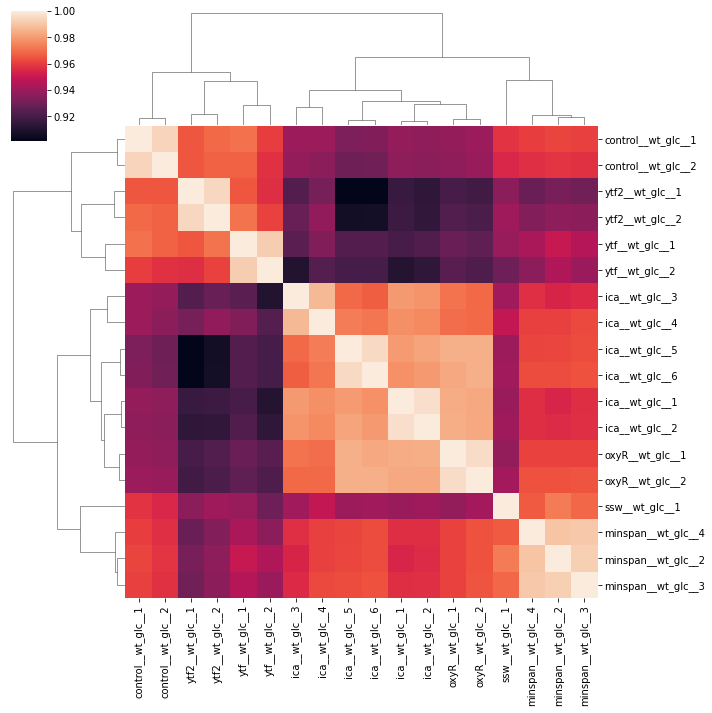

In [14]:
sns.clustermap(corr_df)

In [15]:
corr_df = pd.DataFrame(index = wt_samples, columns = wt_samples)


for i, j in combinations(wt_samples, 2):
    r, p = pearsonr(ica.X[i], ica.X[j])
    corr_df.loc[i, j] = r
    corr_df.loc[j, i] = r
    
corr_df = corr_df.fillna(1)

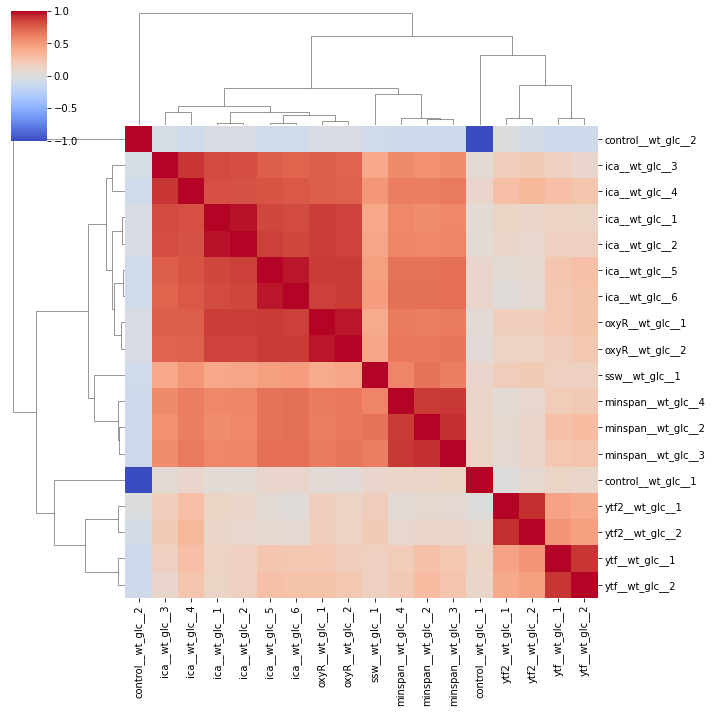

In [16]:
sns.clustermap(corr_df, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)

In [17]:
corr_df.min().min()

-1.0

Text(18.625, 0.5, 'yTF controls')

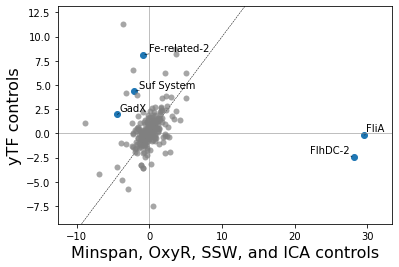

In [18]:
wt_ytf = ['ytf__wt_glc__1', 'ytf__wt_glc__2', 'ytf2__wt_glc__1',
       'ytf2__wt_glc__2']
wt_other = ['minspan__wt_glc__2','oxyR__wt_glc__1', 'oxyR__wt_glc__2',
       'minspan__wt_glc__3', 'minspan__wt_glc__4', 'ssw__wt_glc__1',
       'ica__wt_glc__1', 'ica__wt_glc__2', 'ica__wt_glc__3', 'ica__wt_glc__4',
       'ica__wt_glc__5', 'ica__wt_glc__6']

ax = plot_dima(ica, wt_other, wt_ytf) #, threshold = 1, fdr = 0.2)
ax.set_xlabel('Minspan, OxyR, SSW, and ICA controls', fontsize = 16)
ax.set_ylabel('yTF controls', fontsize = 16)

In [19]:
from sklearn import decomposition, metrics

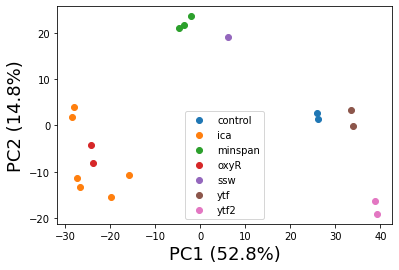

In [30]:
data = ica.A[wt_samples]
wt_sample_meta = ica.sample_table.loc[wt_samples]

pca = decomposition.PCA().fit(data.T)

pc_genes = pd.DataFrame(pca.components_,
                        columns = data.index)
pc_samples = pd.DataFrame(pca.transform(data.T),
                          index = data.columns)

exp_var = pca.explained_variance_ratio_

fig, ax = plt.subplots()

for p, group in wt_sample_meta.groupby('project'):
    ax.scatter(pc_samples.loc[group.index, 0], pc_samples.loc[group.index, 1], label = p)

ax.set_xlabel('PC1 (%.1f%%)'%(exp_var[0]*100), fontsize = 18)
ax.set_ylabel('PC2 (%.1f%%)'%(exp_var[1]*100), fontsize = 18)
ax.legend()

In [31]:
pc1 = pc_genes.loc[0].to_frame('weight')
pc2 = pc_genes.loc[1].to_frame('weight')

# need the absolute values to sort by
pc1['abs_weight'] = pc1.weight.abs()
pc2['abs_weight'] = pc2.weight.abs()

# sort and keep only the top 5
pc1 = pc1.sort_values('abs_weight', ascending = False).iloc[0:5]
pc2 = pc2.sort_values('abs_weight', ascending = False).iloc[0:5]

display(pc1)
display(pc2)

,weight,abs_weight
FlhDC-2,-0.586205,0.586205
FliA,-0.567344,0.567344
RpoS,0.243901,0.243901
Fur-1,0.193983,0.193983
GadX,0.152105,0.152105


,weight,abs_weight
Fur-1,-0.452647,0.452647
RpoS,0.285812,0.285812
Anaero-related,0.236176,0.236176
Fur-2,-0.220265,0.220265
ZntR/Zur/CueR,0.212080,0.212080


## Trace Elt Mixture

In [64]:
ica.sample_table['Trace Element Mixture'].fillna('nan').value_counts()

sauer trace element mixture              401
nan                                      394
aebersold trace element mixture           18
sauer trace element mixture w/o MgSO4      2
Name: Trace Element Mixture, dtype: int64

In [74]:
sauer_samps = ica.sample_table.index[ica.sample_table['Trace Element Mixture'] == 'sauer trace element mixture']
aebersold_samps = ica.sample_table.index[ica.sample_table['Trace Element Mixture'] == 'aebersold trace element mixture']
nan_samps = ica.sample_table.index[ica.sample_table['Trace Element Mixture'].isna()]

In [81]:
aebersold_samps

Index(['omics__bw_ac__1', 'omics__bw_ac__2', 'omics__bw_fum__1',
       'omics__bw_fum__2', 'omics__bw_glc__1', 'omics__bw_glc__2',
       'omics__bw_pyr__1', 'omics__bw_pyr__2', 'cra_crp__wt_ac__1',
       'cra_crp__wt_ac__2', 'cra_crp__wt_fru__1', 'cra_crp__wt_fru__2',
       'cra_crp__delcra_ac__1', 'cra_crp__delcra_ac__2',
       'cra_crp__delcra_fru__1', 'cra_crp__delcra_fru__2',
       'cra_crp__delcra_glc__1', 'cra_crp__delcra_glc__2'],
      dtype='object')

<AxesSubplot:ylabel='Thiamine-1 iModulon\nActivity'>

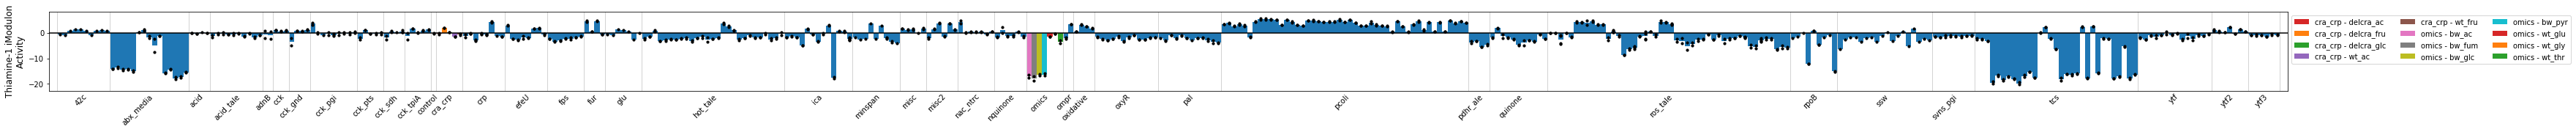

In [86]:
plot_activities(ica, 'Thiamine-1', highlight = ['omics', 'cra_crp'])

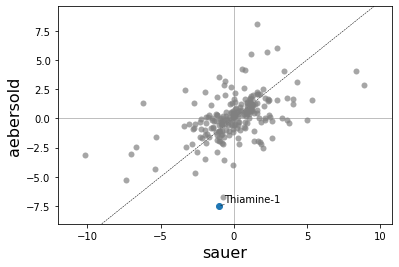

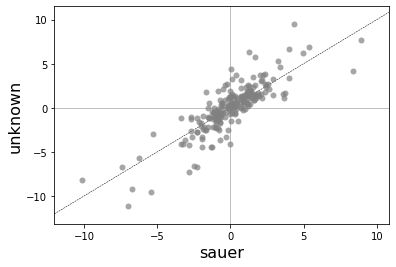

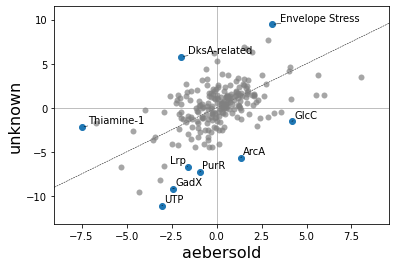

In [80]:
import itertools

name2samps = {'sauer': sauer_samps,
              'aebersold': aebersold_samps,
              'unknown': nan_samps}

for s1, s2 in itertools.combinations(name2samps.keys(), 2):
    ax = plot_dima(ica, name2samps[s1], name2samps[s2])
    ax.set_xlabel(s1, fontsize = 16)
    ax.set_ylabel(s2, fontsize = 16)
    plt.show()